# Series de Taylor y Polinomios de Lagrange

## Conjunto de ejercicios

Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

1. $\frac{1}{25*x^2+1}$ , $x_0=0$

Empezaremos determinando la serie de Taylor y comparando su resultado con la función original.

No se pudo graficar el grado 1: x and y must have same first dimension, but have shapes (500,) and (1,)
No se pudo graficar el grado 2: x and y must have same first dimension, but have shapes (500,) and (1,)


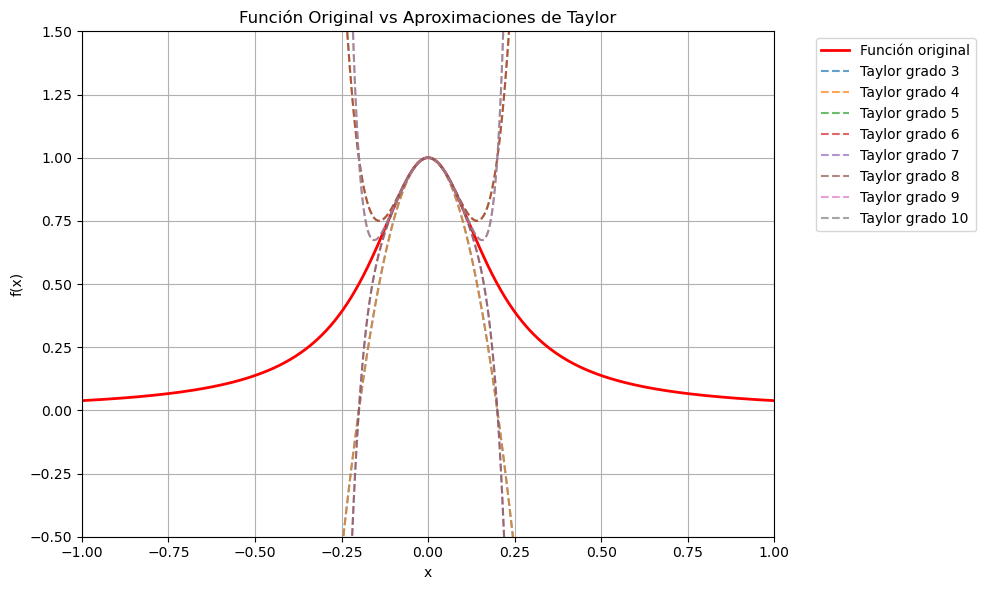

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
x = sp.Symbol('x')
funcion = 1 / (25 * x**2 + 1)
grados = 10  
x_valores = np.linspace(-1, 1, 500)  
funcion_original = sp.lambdify(x, funcion, modules='numpy')
plt.figure(figsize=(10, 6))
plt.plot(x_valores, funcion_original(x_valores), label="Función original", color="red", linewidth=2)
for n in range(1, grados + 1):
    funcion_taylor = sp.series(funcion, x, 0, n).removeO()
    funcion_taylor_numerica = sp.lambdify(x, funcion_taylor, modules='numpy')
    try:
        y_valores = funcion_taylor_numerica(x_valores)
        plt.plot(x_valores, y_valores, label=f"Taylor grado {n}", linestyle="--", alpha=0.7)
    except Exception as e:
        print(f"No se pudo graficar el grado {n}: {e}")

plt.title("Función Original vs Aproximaciones de Taylor")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.axis([-1, 1, -0.5, 1.5])
plt.tight_layout()
plt.show()


En este caso podemos apreciar como la serie de taylor a partir de la aproximación de orden 10 no tiene un cambio de comportamiento significativo.

Polinomio de Lagrange

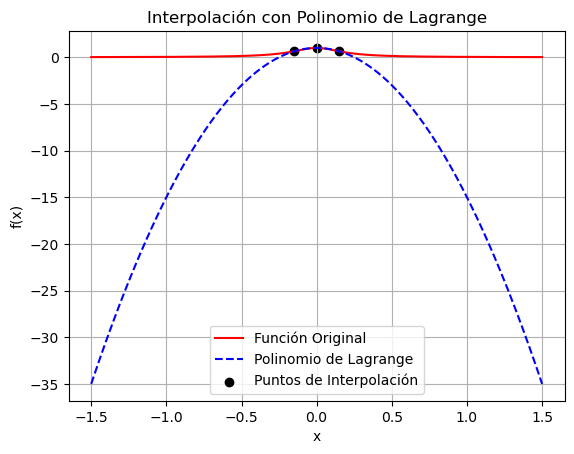

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
x_valores = np.linspace(-1.5, 1.5, 500)
def f(x):
    return 1 / (25 * x**2 + 1)
x_lagrange = np.array([-0.15,0,0.15]) 
y_lagrange = f(x_lagrange)  
polinomio_lagrange = lagrange(x_lagrange, y_lagrange)
y_lagrange_vals = np.polyval(polinomio_lagrange, x_valores)
plt.plot(x_valores, f(x_valores), label="Función Original", color="red")
plt.plot(x_valores, y_lagrange_vals, label="Polinomio de Lagrange", linestyle="--", color="blue")
plt.scatter(x_lagrange, y_lagrange, color="black", label="Puntos de Interpolación")
plt.title("Interpolación con Polinomio de Lagrange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


2. $arctan x$, $x_0=0$

Primero utilizaremos series de taylor hasta encontrar la aproximación que se acerque más a la función real.

No se pudo graficar el grado 1: x and y must have same first dimension, but have shapes (500,) and (1,)


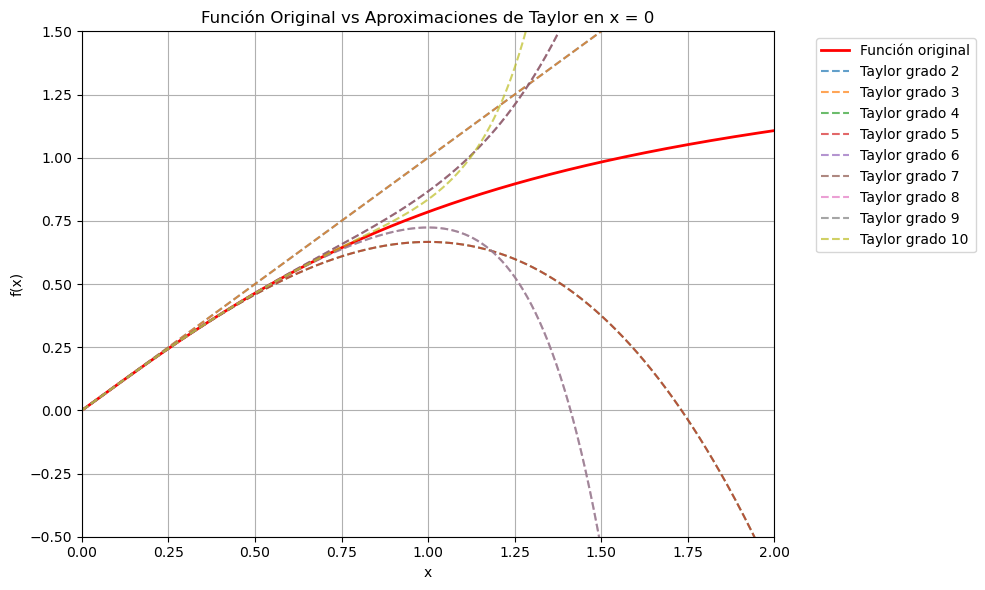

In [22]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
x = sp.Symbol('x')
funcion = sp.atan(x)
grados = 10  
x_punto = 0  
x_valores = np.linspace(0, 2, 500)
funcion_original = sp.lambdify(x, funcion, modules='numpy')
plt.figure(figsize=(10, 6))
plt.plot(x_valores, funcion_original(x_valores), label="Función original", color="red", linewidth=2)
for n in range(1, grados + 1):
    funcion_taylor = sp.series(funcion, x, x_punto, n).removeO()
    funcion_taylor_numerica = sp.lambdify(x, funcion_taylor, modules='numpy')
    try:
        y_valores = funcion_taylor_numerica(x_valores)
        plt.plot(x_valores, y_valores, label=f"Taylor grado {n}", linestyle="--", alpha=0.7)
    except Exception as e:
        print(f"No se pudo graficar el grado {n}: {e}")
plt.title(f"Función Original vs Aproximaciones de Taylor en x = {x_punto}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.axis([0, 2, -0.5, 1.5]) 
plt.tight_layout()
plt.show()


A partir de la serie de Taylor de grado 10 el resultado nooo cambia de manera significativa, siendo esta la razón por la que la escojemos como la mejor aproximación

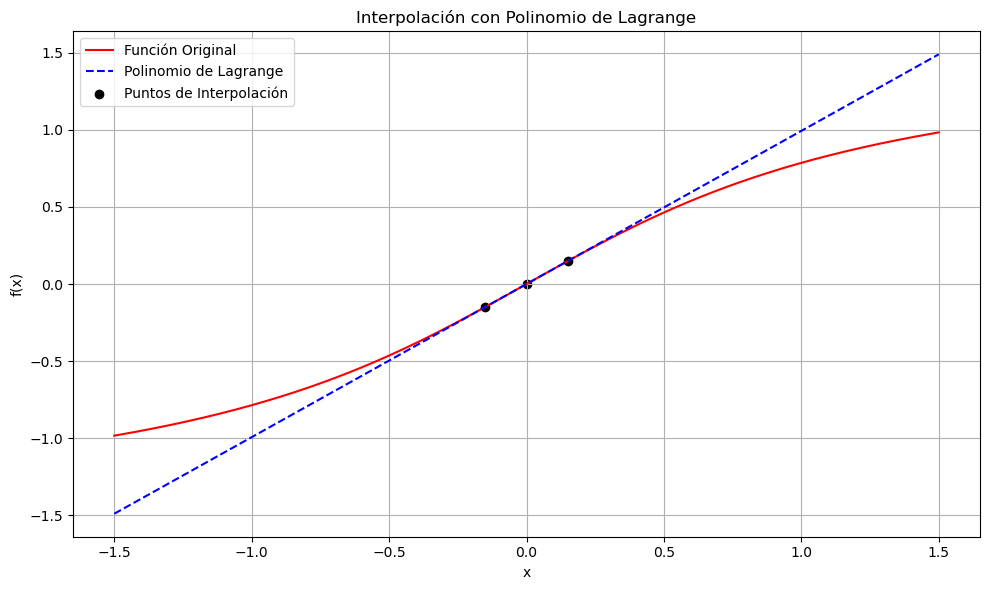

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
def f(x):
    return np.arctan(x)
x_valores = np.linspace(-1.5, 1.5, 500)
x_lagrange = np.array([-0.15, 0, 0.15]) 
y_lagrange = f(x_lagrange)  
polinomio_lagrange = lagrange(x_lagrange, y_lagrange)
y_lagrange_vals = polinomio_lagrange(x_valores)
plt.figure(figsize=(10, 6))
plt.plot(x_valores, f(x_valores), label="Función Original", color="red")
plt.plot(x_valores, y_lagrange_vals, label="Polinomio de Lagrange", linestyle="--", color="blue")
plt.scatter(x_lagrange, y_lagrange, color="black", label="Puntos de Interpolación")
plt.title("Interpolación con Polinomio de Lagrange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
